In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk import word_tokenize
from nltk import sent_tokenize
from nltk.tokenize import RegexpTokenizer

In [2]:
data=pd.read_csv('twitter3.csv',header=None,encoding='latin-1')

In [3]:
twitter=data[:500000]

In [4]:
test=data[500000:500010]

In [5]:
twitter.head(5)

,0,1,2,3,4,5,6
0,638217,0,2234397387,Thu Jun 18 22:58:59 PDT 2009,NO_QUERY,edashwood,"On my way to work,btw it's 8 at morning in Ger..."
1,310252,0,2001068452,Mon Jun 01 23:45:00 PDT 2009,NO_QUERY,josrox,@Sarcia sorry! I've been busy so haven't even ...
2,741527,0,2266288730,Sun Jun 21 08:14:37 PDT 2009,NO_QUERY,mmckayylaa,@ELLEohhELLExxx i know we need to start texti...
3,876991,4,1684874865,Sat May 02 22:19:00 PDT 2009,NO_QUERY,littlejojoe,@AJEntertainment and I'm here aswell looking a...
4,1124080,4,1974609374,Sat May 30 13:29:03 PDT 2009,NO_QUERY,ShayBears,One of six people to gets callback


In [6]:
sen=twitter[6]

In [7]:
twitter[6][2]

'@ELLEohhELLExxx i know  we need to start texting/fb or some shit. &lt;3'

In [8]:
sent=[sen[i].lower() for i in range(len(twitter))]

In [9]:
sent[2]

'@elleohhellexxx i know  we need to start texting/fb or some shit. &lt;3'

In [10]:
tag=twitter[1]

In [11]:
twitter[1][2]

0

In [12]:
len(twitter)

500000

In [13]:
def p(v):
    return len(tag[tag==v])/(len(twitter))

In [14]:
p(0)

0.49966

In [15]:
p(4)

0.50034

In [16]:
def concatData(size):  #maximum size is 15
    ls={}
    for i in range(size):
        ls["l{}".format(i)]=''
        for s in sent[i*100000:(i+1)*100000]:
            ls["l{}".format(i)]=s+ls["l{}".format(i)]
    l=''
    for i in range(size):
        l=ls['l{}'.format(i)]+l
    return l
    

In [17]:
l=concatData(4)

In [18]:
vocabulary=word_tokenize(l)

In [19]:
vocabulary[:10]

['@', 'neyn', 'watched', 'apa', '?', 'iyanih', 'emang', 'kesel', 'bgt', 'udh']

In [20]:
reg1=RegexpTokenizer('\w+')
voc_reg1=reg1.tokenize(l)

In [21]:
len(voc_reg1)

5524551

In [23]:
frq00=nltk.FreqDist(voc_reg1)

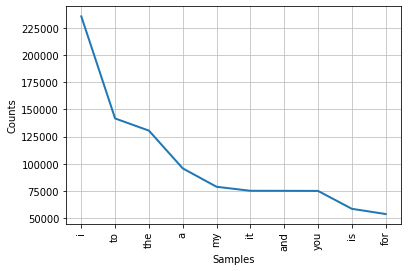

In [24]:
frq00.plot(10)

In [25]:
voc1=set(voc_reg1)

In [26]:
len(voc1)

277839

In [27]:
frq0=nltk.FreqDist(voc1)

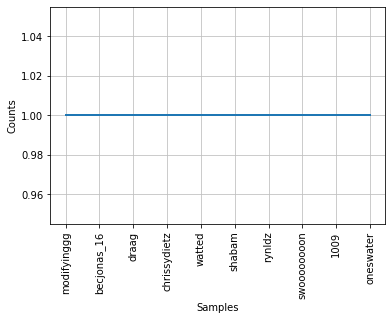

In [28]:
frq0.plot(10)

In [29]:
fr1=nltk.FreqDist(vocabulary)

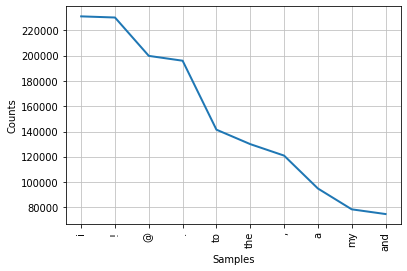

In [30]:
fr1.plot(10)

In [31]:
'times' in word_tokenize(sent[2])

False

In [32]:
#removing @someone from sentences
reg2=RegexpTokenizer('@\w+')
for i in range(len(twitter)):
    se_at=reg2.tokenize(sent[i])
    
    if se_at!=[]:
        sent[i]=sent[i].replace(se_at[0], '')    

In [33]:
dc={}
reg3=RegexpTokenizer('\w+')
for i in range(len(twitter)):
    se_pu=reg3.tokenize(sent[i])
    dc['s{}'.format(i)]=se_pu

In [34]:
dc['s2']

['i',
 'know',
 'we',
 'need',
 'to',
 'start',
 'texting',
 'fb',
 'or',
 'some',
 'shit',
 'lt',
 '3']

In [35]:
sen_0=[]
sen_4=[]
for i in range(len(twitter)):
    if tag[i]==0:
        sen_0.append(dc['s{}'.format(i)])
    elif tag[i]==4:
        sen_4.append(dc['s{}'.format(i)])
            

In [36]:
text_0=set(np.concatenate(sen_0))
text_4=set(np.concatenate(sen_4))

In [37]:
len(text_0)

99075

In [38]:
def nk(word,given_tag,data):#total number of words whose tag is given_tag
    if word not in voc1:
        return 0
    else:
        word_in_sen=[((word in dc['s{}'.format(i)]) and (tag[i]==given_tag)) for i in range(len(data))]
        return sum(word_in_sen)
        
    

In [39]:
nk('@',4,twitter)

0

In [40]:
def n(given_tag):
    if given_tag==0:
        return len(text_0)
    elif given_tag==4:
        return len(text_4)
    else:
        return 0


    

In [41]:
n(0)

99075

In [42]:
def pr(w,given_tag,data):
    n_k=nk(w,given_tag,data)
    n_n=n(given_tag)
    prob=(n_k+1)/(n_n+len(voc1))
    return prob
    
        

In [43]:
pr('back',0,twitter)

0.02636941052866171

In [44]:
def sentiment(new,data):
    tkn=word_tokenize(new)
    p1=1
    q1=1
    for w in tkn:
        p1=p1*pr(w,0,data)
        q1=q1*pr(w,4,data)
    p1=p(0)*p1
    q1=p(4)*q1
    if p1>q1:
        return "Negative"
    else:
        return "Positive"
    
        
        
    

In [45]:
2+3

5

In [46]:
sentiment('i like movie',twitter)

'Positive'

In [47]:
sentiment('hate',twitter)

'Negative'

In [48]:
sentiment('i like movie',twitter)

'Positive'

In [49]:
sentiment('hate',twitter)

'Negative'

In [50]:
sentiment('i like movie',twitter)

'Positive'

In [50]:
sentiment('hate',twitter)

'Negative'

In [44]:
sentiment('i like movie',twitter)

'Positive'

In [45]:
sentiment('hate',twitter)

'Negative'

In [46]:
sentiment('happy',twitter)

'Positive'

In [47]:
sentiment('i love you',twitter)

'Positive'

# Confussion Matrix

In [48]:
TP=5 #True positive:for w in Test if sentiment(w)=Positive and tag(w)=Positive 
FN=3 #False Negative:for w in Test if sentiment(w)=Positive and tag(w)=Negative
FP=2 #False positive:for w in Test if sentiment(w)=Negative and tag(w)=Positive
TN=3 #False positive:for w in Test if sentiment(w)=Negative and tag(w)=Negative

In [49]:
TPR=TP/(TP+FN) #sensitivity, recall, hit rate, or true positive rate (TPR)
PPT=TP/(TP+FP) #precision or positive predictive value (PPV)
ACC=(TP+TN)/(TP+TN+FP+FN) #accuracy (ACC)
F1=(2*TP)/(2*TP+FP+FN) #F1 score is the harmonic mean of precision and sensitivity

In [50]:
N=500000
twit=test[:][6]
tag2=test[:][1]
t=twit[N+2]
t

"back from a fun evening! session with a cute family and thai food afterwards. i leave AZ in the morning, bright n' early. "

In [58]:
tag2

500000    4
500001    4
500002    0
500003    0
500004    0
         ..
549995    4
549996    4
549997    4
549998    4
549999    0
Name: 1, Length: 50000, dtype: int64

In [59]:
tag2[N+1]

4

In [70]:
def confussion_matrix(test_data):
    tp=0
    tn=0
    fp=0
    fn=0
    N=500000
    twit=test[:][6]
    tag2=test[:][1]
    for i in range(len(test_data)):
        snt=twit[N+i]
        prediction=sentiment(snt,twitter)
        actual=tag2[N+i]
        if prediction=='Positive' and actual==4:
            tp=tp+1
        if prediction=='Negative' and actual==0:
            tn=tn+1
        if prediction=='Positive' and actual==0:
            fp=fp+1
        if prediction=='Negative' and actual==4:
            fn=fn+1
    conf={'P_actual':{'P_pred':tp,'N_pred':fn},'N_actual':{'P_pred':fp,'N_pred':tn}}
    df_conf=pd.DataFrame(conf)
    return df_conf  
    

In [72]:
cm=confussion_matrix(test)

In [76]:
cm

,P,N
P,2,2
N,3,3


In [79]:
TPR=cm['P']['P']/(cm['P']['P']+cm['P']['N']) #sensitivity, recall, hit rate, or true positive rate (TPR)
#PPT=TP/(TP+FP) #precision or positive predictive value (PPV)
ACC=(cm['P']['P']+cm['N']['N'])/(cm['P']['P']+cm['P']['N']+cm['N']['P']+cm['N']['N']) #accuracy (ACC)
#F1=(2*TP)/(2*TP+FP+FN) #

In [78]:
TPR

0.4

In [80]:
ACC

0.5